# Логистическая регрессия

Рассмотрим задачу классификации на два класса. Используя теорему Байеса мы можем записать вероятность класса при заданных признаках (для простоты допустим признак всего один):

$$\large \begin{array}{rcl} p\left(c = 0 \mid x \right) &=& \frac{p\left(x \mid c = 0\right) p\left(c = 0\right)} {p\left(x \mid c = 0\right) p\left(c = 0\right) + p\left(x \mid c = 1\right) p\left(c = 1\right)}  \\
&=& \frac{1}{1 + e^{-a}} = \sigma\left(a\right)
\end{array}$$

где:
$$\large a = \ln \frac{p\left(x \mid c = 0\right) p\left(c = 0\right)}{p\left(x \mid c = 1\right) p\left(c = 1\right)}$$
$\large a$ называется отношением вероятностей.

Интересной особеностью сигмоида является то, что его производная выражается через значение самого себя:

$${\large  \sigma(x)={\frac {1}{1+e^{-x}}}={\frac {e^{x}}{1+e^{x}}},}$$


$$\large \frac{\partial \sigma\left(x\right)}{\partial x} = {\frac {e^{x}\cdot (1+e^{x})-e^{x}\cdot e^{x}}{(1+e^{x})^{2}}}={\frac {e^{x}}{(1+e^{x})^{2}}}=\sigma(x){\big (}1-\sigma(x){\big )}$$

In [5]:
# plot graphics in the notebook 
%matplotlib inline
# support operations for large, multi-dimensional arrays and matrices
import numpy as np
# make experiments reproducible
np.random.seed(12345)
# extension of main plotting library matplotlib
import seaborn as sns
# main library for plotting
import matplotlib.pyplot as plt
# set style
plt.style.use("fivethirtyeight")
# set default size of plots
plt.rcParams['figure.figsize'] = 16, 10

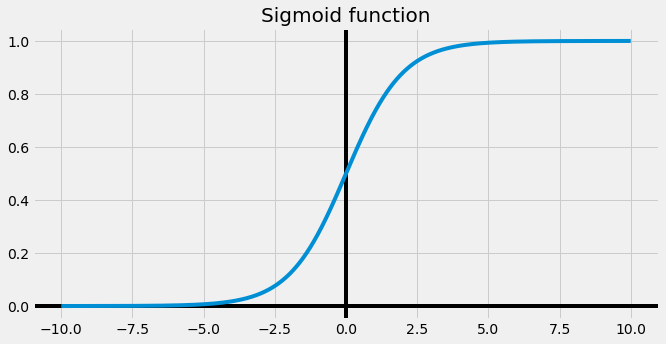

In [11]:
# define scalar function
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def dsigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

# make vectorized function from scalar
sigmoid = np.vectorize(sigmoid)

x = np.linspace(-10, 10, 1000)

plt.rcParams['figure.figsize'] = 10, 5
plt.axvline(0, color='black', linestyle='-', label='origin')
plt.axhline(0, color='black', linestyle='-')
plt.plot(x, sigmoid(x))
# plt.plot(x, dsigmoid(x))
plt.title('Sigmoid function', fontsize=20)
plt.show()

![linear_logistic_regression](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1534281070/linear_vs_logistic_regression_edxw03.png)

Допустим, что признаки внутри классов распределены нормально со своим средним и дисперсией:
$$\large p\left( x \mid c = k \right) \sim \mathcal{N}\left( \mu_k, \sigma \right)$$

а так же, для начала, допустим, что классы равновероятны:
$$\large \begin{array}{rcl} a &=& \ln \frac{p\left(x \mid c = 0\right)}{p\left(x \mid c = 1\right)} \\
&=& \ln p\left(x \mid c = 0\right) - \ln p\left(x \mid c = 1\right)\\
&=& \frac{1}{2\sigma^2} \left(\mu_1 - x\right)^2 -\frac{1}{2\sigma^2} \left(\mu_0 - x\right)^2 \\
&=& \frac{1}{2\sigma^2} \left(\left(\mu_1 - x\right)^2 - \left(\mu_0 - x\right)^2\right) \\
&=& \frac{1}{2\sigma^2} \left(\mu_1^2 - 2\mu_1 x + x^2 - \mu_0^2 + 2 \mu_0 x - x^2\right) \\
&=& \frac{\mu_1^2 - \mu_0^2}{2\sigma^2} + \frac{\mu_0 - 2\mu_1}{\sigma^2}x \\
&=& w_0 + w_1 x\\
\end{array}$$

Получается, что функция логистического сигмоида от линейной комбинации признаков и параметров естественно всплывает при предположении о нормальности признаков внутри класса.

*Логистическая регрессия* - это модель, где параметры линейной функции $\large \vec{w}$ оптимизируются напрямую.

Вспомним распределение Бернулли - это распределение случайной величины, которая принимает значение $1$ с вероятностью $\large p$, и значение $0$ с вероятностью $\large q = 1 - p$:
$$\large p\left(k \mid p\right) = p^k \left(1 - p\right)^{1 - k}$$

Короткий пример: монетку подкинули $\large n + m$ раз, $\large n$ раз выпал орел и $\large m$ раз решка. Найдем [оценку максимального правдоподобия](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%BC%D0%B0%D0%BA%D1%81%D0%B8%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B3%D0%BE_%D0%BF%D1%80%D0%B0%D0%B2%D0%B4%D0%BE%D0%BF%D0%BE%D0%B4%D0%BE%D0%B1%D0%B8%D1%8F) вероятности выпадения орла $\large p(\text{head}) = p$

$$\large \begin{array}{rcl}\mathcal{L} &=& \ln p^n \left(1 - p\right)^m \\
\frac{\partial \mathcal{L}}{\partial p} &=& \frac{n}{p} - \frac{m}{1 - p} \\
\frac{\partial \mathcal{L}}{\partial p} = 0 &\Leftrightarrow& \frac{n}{p} = \frac{m}{1 - p} \\
&\Leftrightarrow& p = \frac{n}{n + m}
\end{array}$$

Сделаем тоже самое для набора данных $\large D = \left\{\left(\vec{x}_i, y_i\right)\right\}_{i=1,\ldots,n}$, $\large \forall i, y_i \in \left\{0, 1\right\}$, тогда правдоподобие набора:

$$\large \begin{array}{rcl}\mathcal{L} &=& \ln \prod_{i=1}^n p\left(c = 0 \mid \vec{x}_i \right)^{y_i} \left(1 - p\left(c = 0 \mid \vec{x}_i \right)\right)^{1 - y_i} \\
&=& \ln \prod_{i=1}^n \sigma\left(\vec{w}^T \vec{x}_i\right)^{y_i} \left(1 - \sigma\left(\vec{w}^T \vec{x}_i\right)\right)^{1 - y_i} \\
&=& \sum_{i=1}^n y_i \ln \sigma\left(\vec{w}^T \vec{x}_i\right) + \left(1 - y_i\right) \ln \left(1 - \sigma\left(\vec{w}^T \vec{x}_i\right)\right)
\end{array}$$

Найдем формулу обновления весов логистической регрессии для градиентного спуска:
$$\large \begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \vec{w}} &=& \frac{\partial}{\partial \vec{w}}\sum_{i=1}^n y_i \ln \sigma\left(\vec{w}^T \vec{x}_i\right) + \left(1 - y_i\right) \ln \left(1 - \sigma\left(\vec{w}^T \vec{x}_i\right)\right) \\
&=& \sum_{i=1}^n y_i \frac{1}{\sigma} \sigma \left(1 - \sigma\right) \vec{x}_i + \left(1 - y_i\right) \frac{1}{1 - \sigma} \left(-1\right)\sigma \left(1 - \sigma\right) \vec{x}_i \\
&=& \sum_{i=1}^n y_i \left(1 - \sigma\right) \vec{x}_i - \left(1 - y_i\right) \sigma \vec{x}_i \\
&=& \sum_{i=1}^n \vec{x}_i \left(y_i - \sigma \left(\vec{w}^T \vec{x}_i\right) \right)
\end{array}$$

Тогда мы можем найти оптимальные веса с помошью градиетного спуска:

$$\large \vec{w}_{\text{new}} := \vec{w} + \alpha \frac{\partial \mathcal{L}}{\partial \vec{w}}$$
где:
* $\large \alpha$ - это скорость обучения или размер градиентного шага.


In [23]:
import sklearn.datasets

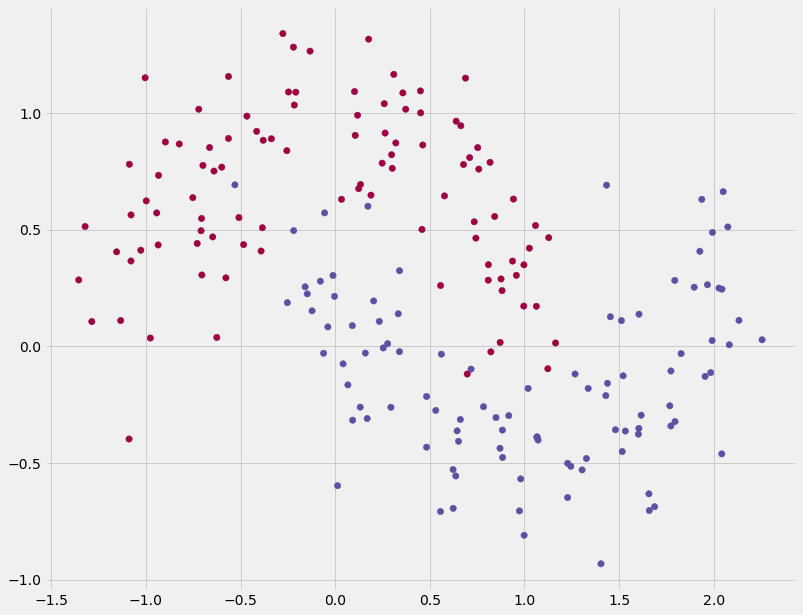

In [193]:
# Generate a dataset and plot it
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.rcParams['figure.figsize'] = 12, 10
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [194]:
import time
from IPython import display

def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

In [195]:
class Classifier(object):
    """Base class for classifiers."""

    def fit(X, y):
        pass
    
    def predict(X):
        pass


In [196]:
class LogisticRegression(Classifier):
    
    def __init__(self,
                 add_intercept=True,
                 learning_rate=0.01,
                 max_iteration=1000,
                 verbose=0,
                 early_stopping=True,
                 max_iter_without_loss=5
                ):
        self.add_intercept = add_intercept
        self.learning_rate = learning_rate
        self.max_iteration = max_iteration
        self.verbose = verbose
        self.early_stopping = early_stopping
        self.max_iter_without_loss = max_iter_without_loss

        
    @staticmethod
    def _sigmoid(x):
        return 1/(1 + np.exp(-x))
    
    @staticmethod
    def _log_loss(y_true, y_pred):
        return - np.mean(y_true*np.log(y_pred) + (1-y_true) * np.log(1 - y_pred))
    
    
    def fit(self, X, y):
        if self.add_intercept:
            intercept = np.ones((X.shape[0], 1))
            X = np.hstack((intercept, X))
            
            
        self.weights = np.zeros(X.shape[1])
    
        min_loss = 10**6
        n_iter_no_change = 0
        for i in range(self.max_iteration):
            # get preds
            scores = np.dot(X, self.weights)
            predictions = self._sigmoid(scores)

            # how much did we miss?
            loss = self._log_loss(y, predictions)
            d_loss = y - predictions
            
            if self.verbose:
                if (i % 1) == 0:
                    print(loss)

            # update weights
            self.weights = self.weights + self.learning_rate * np.dot(X.T, d_loss)
            
            #early stopping
            if loss < min_loss:
                min_loss = loss
                n_iter_without_loss = 0
            else:
                n_iter_without_loss += 1
                
                
            if self.early_stopping:
                if n_iter_without_loss == self.max_iter_without_loss:
                    if self.verbose:
                        print(f'Stopped on {i} interation with loss {min_loss}')
                    break

    def predict_proba(self, X):
        if self.add_intercept:
            intercept = np.ones((X.shape[0], 1))
            X = np.hstack((intercept, X))
            
        scores = np.dot(X, self.weights)
        predictions = self._sigmoid(scores)
        return predictions
                    
            
    def predict(self, X):
        return np.round(self.predict_proba(X))
    

In [197]:
from sklearn.linear_model import LogisticRegression as SkLogisticRegression

In [198]:
lr = SkLogisticRegression()
# lr = LogisticRegression(verbose=1)

In [199]:
lr.fit(X, y)

LogisticRegression()

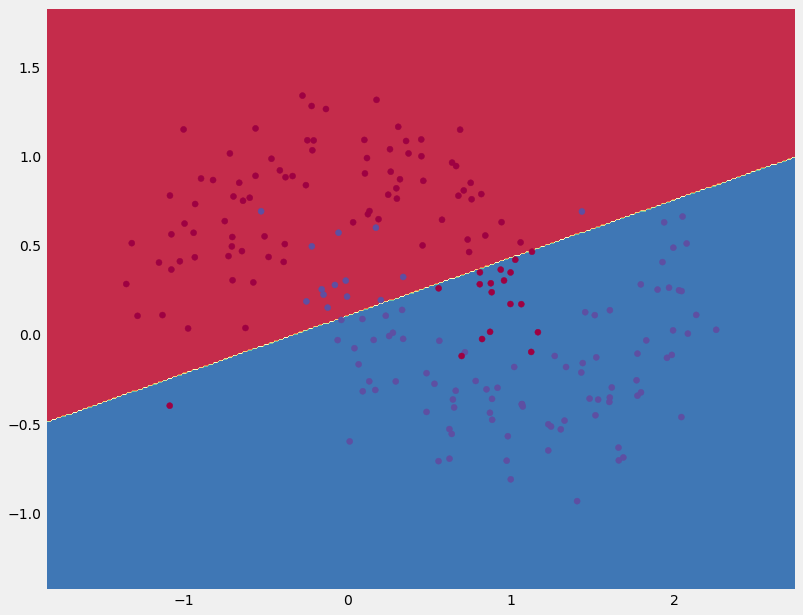

In [200]:
plot_decision_boundary(lr.predict)

## Мультиклассовая классификация

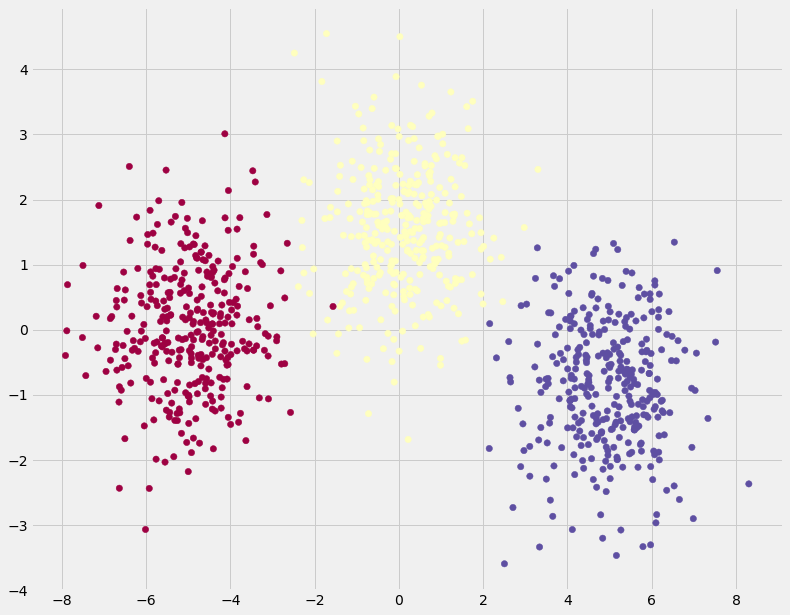

In [223]:
np.random.seed(0)
centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = sklearn.datasets.make_blobs(n_samples=1000, centers=centers, random_state=40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [230]:
lr = SkLogisticRegression(multi_class='ovr') # multi_class : {'ovr', 'multinomial'}
lr.fit(X, y)
plot_decision_boundary(lr.predict)

In [ ]:
lr = SkLogisticRegression(multi_class='multinomial') # multi_class : {'ovr', 'multinomial'}
lr.fit(X, y)
plot_decision_boundary(lr.predict)

***1.HW  - Реализовать [softmax](https://en.wikipedia.org/wiki/Softmax_function) регресию для мультиклассовая класификации***

$$ \sigma ({z} )_{i}={\frac {e^{z_{i}}}{\sum _{j=1}^{K}e^{z_{j}}}}\ \ \ \ {\text{ for }}i=1,\dotsc ,K{\text{ and }}  {z} =(z_{1},\dotsc ,z_{K})\in \mathbb {R} ^{K}. $$

## Классификация текста

Попробуем предсказать "токсичность" текста из соревнования Kaggle [Toxic Comment Classification Challenge](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge)

Данные можно скачать тут - https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/data

In [234]:
import pandas as pd

In [235]:
train = pd.read_csv('../data/train_toxic.csv')

In [236]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [237]:
from sklearn.feature_extraction.text import CountVectorizer

![tf-idf](https://habrastorage.org/files/a0a/bb1/2e9/a0abb12e9ed94624ade0b9090d26ad66.png)

In [238]:
word_vectorizer = CountVectorizer()

In [239]:
train_word_features = word_vectorizer.fit_transform(train['comment_text'])

In [240]:
test_size = 1000
target = 'toxic'

x_train = train_word_features[:-test_size]
x_test = train_word_features[-test_size:]
y_train = train[target][:-test_size]
y_test = train[target][-test_size:]

In [241]:
x_train.shape, x_test.shape

((158571, 189775), (1000, 189775))

In [242]:
y_train.value_counts(normalize=True)

0    0.904056
1    0.095944
Name: toxic, dtype: float64

In [243]:
y_test.value_counts(normalize=True)

0    0.92
1    0.08
Name: toxic, dtype: float64

In [259]:
lr = SkLogisticRegression()
lr.fit(x_train, y_train)

/Users/terpiljenya/projects/machine_learning_projector/venv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [246]:
preds = lr.predict(x_test)

In [247]:
from sklearn.metrics import roc_auc_score

In [248]:
roc_auc_score(y_test, preds)

0.8434782608695651

### Анализ модели

In [249]:
test_text = """
    hi,idiot, why are you delate my talking, just come out say 
"""

In [250]:
lr.predict(word_vectorizer.transform([test_text]))

/Users/terpiljenya/projects/machine_learning_projector/venv/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:1209: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  "Upper case characters found in"


array([1])

In [251]:
lr.predict_proba(word_vectorizer.transform([test_text]))

array([[0.08179745, 0.91820255]])

In [253]:
import eli5

In [254]:
eli5.explain_weights(lr, feature_names=word_vectorizer.get_feature_names())

/Users/terpiljenya/projects/machine_learning_projector/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Weight?,Feature
+5.584,fuck
+5.324,faggot
+4.948,fucked
+4.735,fucking
+4.579,bastard
+4.448,shit
+4.390,idiot
+4.293,sucks
+4.220,stupid
+4.207,asshole


In [256]:
eli5.explain_prediction(lr, test_text, vec=word_vectorizer, feature_names=word_vectorizer.get_feature_names())

Explanation(estimator='LogisticRegression()', description=None, error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target=1, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='idiot', weight=4.3903046191887976, std=None, value=1.0), FeatureWeight(feature='you', weight=0.4256237851779055, std=None, value=1.0), FeatureWeight(feature='are', weight=0.24565038318731638, std=None, value=1.0), FeatureWeight(feature='come', weight=0.2453501774062033, std=None, value=1.0), FeatureWeight(feature='my', weight=0.17017646977889234, std=None, value=1.0), FeatureWeight(feature='out', weight=0.1477737882301462, std=None, value=1.0)], neg=[FeatureWeight(feature='<BIAS>', weight=-2.6607758668722252, std=None, value=1.0), FeatureWeight(feature='say', weight=-0.215455243794403, std=None, value=1.0), FeatureWeight(feature='hi', weight=-0.17650925913926607, std=None, value=1.0), FeatureWeight(feature='why', weight=-0.08159242125775323, std=None, value=1.0), FeatureWeight(feature='just', weight=-0.0598288534621997, std=None, value=1.0), FeatureWeight(feature='talking', weight=-0.00985920228224907, std=None, value=1.0), FeatureWeight(feature='delate', weight=-0.0026864648320204933, std=None, value=1.0)], pos_remaining=0, neg_remaining=0), proba=0.9182025478875369, score=2.418171911329144, weighted_spans=WeightedSpans(docs_weighted_spans=[DocWeightedSpans(document='\n    hi,idiot, why are you delate my talking, just come out say \n', spans=[('hi', [(5, 7)], -0.17650925913926607), ('idiot', [(8, 13)], 4.3903046191887976), ('why', [(15, 18)], -0.08159242125775323), ('are', [(19, 22)], 0.24565038318731638), ('you', [(23, 26)], 0.4256237851779055), ('delate', [(27, 33)], -0.0026864648320204933), ('my', [(34, 36)], 0.17017646977889234), ('talking', [(37, 44)], -0.00985920228224907), ('just', [(46, 50)], -0.0598288534621997), ('come', [(51, 55)], 0.2453501774062033), ('out', [(56, 59)], 0.1477737882301462), ('say', [(60, 63)], -0.215455243794403)], preserve_density=False, vec_name=None)], other=FeatureWeights(pos=[FeatureWeight(feature=<FormattedFeatureName 'Highlighted in text (sum)'>, weight=5.078947778201369, std=None, value=None)], neg=[FeatureWeight(feature='<BIAS>', weight=-2.6607758668722252, std=None, value=1.0)], pos_remaining=0, neg_remaining=0)), heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

---

Полезные ссылки:
* [cs229 by Andrew Ng](https://cs229.stanford.edu/notes2021fall/cs229-notes1.pdf)